In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

import pprint

### reading data

In [2]:
with open("sort_in_strategies.json") as fin:
    t = fin.read()

In [3]:
data = json.loads(t)
#pprint.pprint(data)

### preprocess

In [4]:
data_np = {}
for strategy, sentences in data.items():
    temp_data = np.zeros((len(sentences), 2))
    for i, sentence in enumerate(sentences):
        temp_data[i][0] = sentence["ch_mean"]
        temp_data[i][1] = sentence["en_mean"]
    data_np[strategy] = temp_data

### strategy-wise t-test and p-value

In [11]:
for strategy, arr in data_np.items():
    ttest_result = stats.ttest_ind(arr[:, 0], arr[:, 1])
    print(f"{strategy}")
    print(ttest_result)

feature_politeness_==2nd_person==
Ttest_indResult(statistic=5.013216824635514, pvalue=6.518243610949175e-07)
feature_politeness_==HASHEDGE==
Ttest_indResult(statistic=2.739274862402433, pvalue=0.0064343462420056305)
feature_politeness_==HASPOSITIVE==
Ttest_indResult(statistic=3.086263283994011, pvalue=0.0021374904860140373)
feature_politeness_==Direct_question==
Ttest_indResult(statistic=1.283687864637568, pvalue=0.20045901594645588)
feature_politeness_==Factuality==
Ttest_indResult(statistic=2.191478158625658, pvalue=0.033518621452833186)
feature_politeness_==SUBJUNCTIVE==
Ttest_indResult(statistic=5.014347806120296, pvalue=1.303276349218317e-06)
feature_politeness_==HASNEGATIVE==
Ttest_indResult(statistic=3.0162522921268438, pvalue=0.0027304133210836606)
feature_politeness_==1st_person==
Ttest_indResult(statistic=3.1550730557465334, pvalue=0.0017162019489397353)
feature_politeness_==Hedges==
Ttest_indResult(statistic=1.1460968851679547, pvalue=0.2531964558566462)
feature_politeness_=

### plot

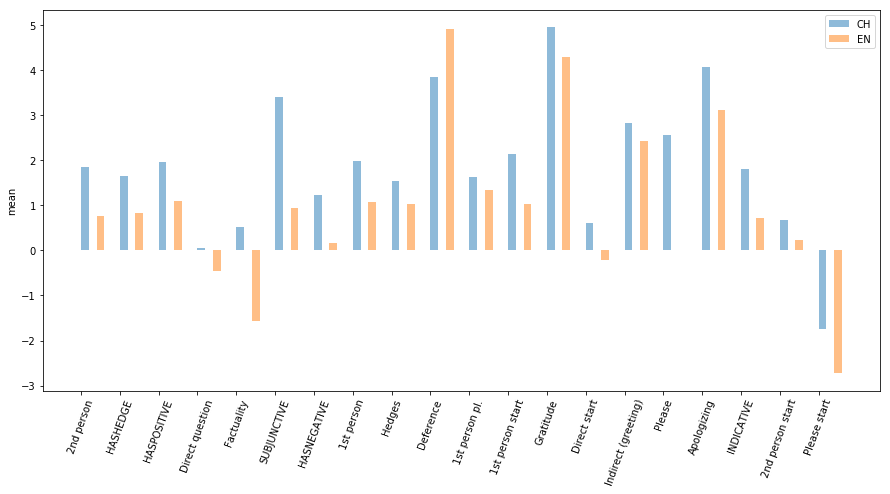

In [5]:
fig, ax = plt.subplots()

fig.set_size_inches((15, 7))

plt.xticks(rotation=70)

keys = []
ch_vals = []
en_vals = []
for strategy, arr in data_np.items():
    keys.append(strategy)
    ch_vals.append(arr[:, 0].mean())
    en_vals.append(arr[:, 1].mean())

ch_vals = np.array(ch_vals)
en_vals = np.array(en_vals)
y_pos = np.arange(len(keys))
ax.bar(y_pos-0.2, ch_vals, width=0.2, align='edge', alpha=0.5, label="CH")
ax.bar(y_pos+0.2, en_vals, width=0.2, align='edge', alpha=0.5, label="EN")
ax.set_xticks(y_pos - 0.2)
ax.set_xticklabels(keys)
ax.set_ylabel('mean')
ax.legend()

plt.show()

Text(0,0.5,'Frequency')

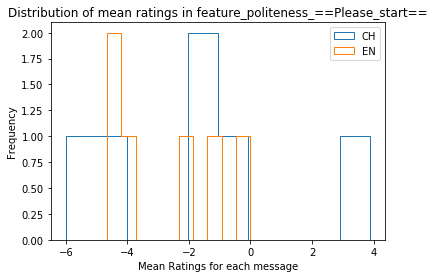

In [15]:
target = "feature_politeness_==Please_start=="
arr = data_np[target]

plt.hist(arr[:, 0], histtype='step', rwidth=0.01, label="CH")
plt.hist(arr[:, 1], histtype='step', rwidth=0.01, label="EN")
plt.legend()
plt.title(f"Distribution of mean ratings in {target}")
plt.xlabel("Mean Ratings for each message")
plt.ylabel("Frequency")

In [4]:
import pprint
pprint.pprint(json.loads(t))

{'feature_politeness_==1st_person==': [{'Num': 5,
                                        'Request': 'May I also ask how '
                                                   'CheckUser became involved '
                                                   'in the matter? To justify '
                                                   'such a use of computer '
                                                   'records, surely someone '
                                                   'needs to invoke a due '
                                                   'process of some kind for '
                                                   'the action to be '
                                                   'justified?',
                                        'ch_mean': 3.5999999046325684,
                                        'en_mean': -0.75},
                                       {'Num': 12,
                                        'Request': 'Hi, <name>, I was just '
             

                                                   'sockmaster (the account '
                                                   'controlling all the sock '
                                                   'puppets) in the box?',
                                        'ch_mean': -0.20000000298023224,
                                        'en_mean': -1.0},
                                       {'Num': 202,
                                        'Request': "Hi <name> I can't seem to "
                                                   'find a hook I entered in '
                                                   "DYK Feb 24, it's about the "
                                                   'novel <url>, along with '
                                                   'suggestions from other '
                                                   'eds. Can you find what '
                                                   'happened to it, please?',
                                   

                                       {'Num': 1088,
                                        'Request': "Third: it's August 31 "
                                                   '2010. Please check my '
                                                   'userpage for reasons why I '
                                                   "really don't feel useful "
                                                   'today. Ask another admin, '
                                                   'okay?',
                                        'ch_mean': -4.5,
                                        'en_mean': -4.666666507720947},
                                       {'Num': 1089,
                                        'Request': 'Hey, can you block this '
                                                   'moron from editing the '
                                                   'IIHF Page? Or what can i '
                                                   'do in such cases?',
       

                                       {'Num': 1262,
                                        'Request': 'I will endeavour to be '
                                                   '(cant think of antonyms) '
                                                   'non-combative and kind. '
                                                   'Will you give me a '
                                                   'particular example of what '
                                                   'I wrote and what I should '
                                                   'have written?',
                                        'ch_mean': 3.25,
                                        'en_mean': 2.142857074737549},
                                       {'Num': 1265,
                                        'Request': 'Since you already had the '
                                                   'filmography listed I cut '
                                                   'some films from the

                                              'ch_mean': 2.5,
                                              'en_mean': 1.25},
                                             {'Num': 21,
                                              'Request': "I think we're going "
                                                         'to just have to '
                                                         'agree to disagree on '
                                                         'whether it is a sub '
                                                         'genre or fusion '
                                                         'then! Can we at '
                                                         'least agree to leave '
                                                         'the three genres on '
                                                         'Dookie as they are?',
                                              'ch_mean': -5.199999809265137,
                              

                                                         "or ''Schleisen''?",
                                              'ch_mean': 0.6000000238418579,
                                              'en_mean': 5.55555534362793},
                                             {'Num': 229,
                                              'Request': 'I am out of YUBC (I '
                                                         'wonder myself how '
                                                         'can I even post '
                                                         'here). Could you do '
                                                         'it?',
                                              'ch_mean': 1.2000000476837158,
                                              'en_mean': -0.2222222238779068},
                                             {'Num': 233,
                                              'Request': 'I was just about to '
                                       

                                                         'removed this '
                                                         "category from 'url' "
                                                         "and 'url'. Why don't "
                                                         'you think they '
                                                         'qualify as '
                                                         'historical films?',
                                              'ch_mean': 2.0,
                                              'en_mean': -1.0},
                                             {'Num': 1122,
                                              'Request': 'My contribution '
                                                         'tried to show the '
                                                         'impression to others '
                                                         "I'am only trying to "
                                          

                                                   'there, why not just delete '
                                                   'it completely?',
                                        'ch_mean': 0.25,
                                        'en_mean': 0.25},
                                       {'Num': 13,
                                        'Request': 'Also, both <url> and <url> '
                                                   'wikilink "hiatus", which '
                                                   'goes to a disambiguation '
                                                   'page. What meaning of the '
                                                   'word did you intend?',
                                        'ch_mean': -1.75,
                                        'en_mean': 0.0},
                                       {'Num': 14,
                                        'Request': 'I am puzzled by your '
                                                 

                                        'en_mean': 5.5},
                                       {'Num': 118,
                                        'Request': 'The Olbermann thing is '
                                                   'being discussed on the '
                                                   '<url> talk page. Do you '
                                                   'have anything to add?',
                                        'ch_mean': 1.399999976158142,
                                        'en_mean': 3.625},
                                       {'Num': 123,
                                        'Request': 'It turns out that the '
                                                   'Zelda Collection you '
                                                   'referred to in <url> '
                                                   "didn't include aLttP, "
                                                   'reportedly because the GBA '
                   

                                        'ch_mean': 2.5,
                                        'en_mean': 2.5714285373687744},
                                       {'Num': 233,
                                        'Request': 'I was just about to create '
                                                   'an article on the 2009 '
                                                   'Malawian election; the '
                                                   'purpose of adding it to '
                                                   'the template was to give '
                                                   'me a convenient link when '
                                                   'I decided to do it. If red '
                                                   "linked elections can't go "
                                                   "in the template, why don't "
                                                   'you delete all the red '
                             

                                       {'Num': 1033,
                                        'Request': 'I have attempted to '
                                                   'address your concern. '
                                                   'Could you take another '
                                                   'look at the article?',
                                        'ch_mean': 4.166666507720947,
                                        'en_mean': 1.7142857313156128},
                                       {'Num': 1035,
                                        'Request': 'The notion that a hunter '
                                                   'would kill dozens of birds '
                                                   'with a single shot seems '
                                                   'outlandish to me.  Do you '
                                                   'have a reference for this?',
                                        'ch_mean':

                                                   '"sorry, not enough content '
                                                   'to play this station". Can '
                                                   'you explain a bit what '
                                                   'your code do, and does '
                                                   'this need an account on '
                                                   'Lastfm or something else ?',
                                        'ch_mean': 2.0,
                                        'en_mean': 0.7142857313156128},
                                       {'Num': 1134,
                                        'Request': "It's a shame that 'url' "
                                                   'still needs repair.  What '
                                                   'do you think?',
                                        'ch_mean': 2.8888888359069824,
                                        'en_mea

                                        'ch_mean': 1.0,
                                        'en_mean': -0.4285714328289032},
                                       {'Num': 1227,
                                        'Request': 'Hi - I noticed the same, '
                                                   'and was wondering how you '
                                                   "do it!  I've been trying "
                                                   "to get 'url' next to my "
                                                   'name by default and I '
                                                   "can't seem to manage it... "
                                                   'any help?',
                                        'ch_mean': 4.142857074737549,
                                        'en_mean': 2.2857143878936768},
                                       {'Num': 1228,
                                        'Request': 'Hi, I saw you protected '
        

                                                         'managed the '
                                                         'now-defunct Major '
                                                         'League Baseball '
                                                         'Providence '
                                                         'Grays...\'\'" - '
                                                         'maybe '
                                                         '"\'\'\'his\'\'\' '
                                                         'now-defunct Major '
                                                         'League Baseball '
                                                         "'''team, the''' "
                                                         'Providence '
                                                         'Grays,..."?',
                                              'ch_mean': -0.8333333134651184,
                                 

                                             'ch_mean': 0.0,
                                             'en_mean': 2.0},
                                            {'Num': 42,
                                             'Request': 'Could you please '
                                                        'explain to me what '
                                                        'the buttons do? How '
                                                        'do you "Not accept" a '
                                                        "change, that's "
                                                        'what...you revert it, '
                                                        "don't you...?",
                                             'ch_mean': 3.25,
                                             'en_mean': 3.4285714626312256},
                                            {'Num': 43,
                                             'Request': 'to the Citations '
        

                                             'en_mean': 0.1428571492433548},
                                            {'Num': 1108,
                                             'Request': "I've just seen your "
                                                        'message on my Talk '
                                                        'page.  Why do you '
                                                        'want the '
                                                        'disambiguation page '
                                                        'to be the one that '
                                                        "doesn't say "
                                                        '"disambiguation"?',
                                             'ch_mean': 4.166666507720947,
                                             'en_mean': -1.0},
                                            {'Num': 1110,
                                             'Request': 'You m

                                         {'Num': 245,
                                          'Request': "If you're not using your "
                                                     'user page, you should '
                                                     'try redirecting it to '
                                                     'your talk. Or is this a '
                                                     'statement on the '
                                                     'futility of userpages in '
                                                     'general?',
                                          'ch_mean': 1.7999999523162842,
                                          'en_mean': -2.3333332538604736},
                                         {'Num': 247,
                                          'Request': "I don't think I'll have "
                                                     'the time to keep the '
                                                   

                                       'ch_mean': 5.199999809265137,
                                       'en_mean': 8.0},
                                      {'Num': 37,
                                       'Request': 'Thanks for the help! That '
                                                  'info should be on <url> in '
                                                  'easy to read form, no?',
                                       'ch_mean': 5.199999809265137,
                                       'en_mean': 5.5},
                                      {'Num': 62,
                                       'Request': 'Thanks for the heads up. He '
                                                  "doesn't know any english?",
                                       'ch_mean': -2.0,
                                       'en_mean': 1.8571428060531616},
                                      {'Num': 95,
                                       'Request': 'Thanks. Do you happen to '


                                      'en_mean': 4.0},
                                     {'Num': 115,
                                      'Request': 'I find it hard to believe '
                                                 'one editor (even one so '
                                                 'prolific as RickK) can have '
                                                 'much of an effect overall. '
                                                 'Do contributors on either '
                                                 'side have any '
                                                 '(non-anecdotal) evidence '
                                                 'that suggests otherwise?',
                                      'ch_mean': 1.7999999523162842,
                                      'en_mean': -1.125},
                                     {'Num': 117,
                                      'Request': 'Hi, I recently got approval '
                           

                                      'Request': "Hi <name> - I've been "
                                                 'noticing your sig on '
                                                 'WP:CFD... this is probably '
                                                 'something you know all about '
                                                 'but... you do know about '
                                                 'being able to use four '
                                                 'tildes '
                                                 '(<nowiki>~~~~</nowiki>) to '
                                                 "sign, don't you? Or have you "
                                                 'done some fancy trick with '
                                                 'your signature to stop it '
                                                 'linking back to your user '
                                                 'page?',
                             

                                      'ch_mean': 2.2857143878936768,
                                      'en_mean': 2.0},
                                     {'Num': 1248,
                                      'Request': 'Also, how does the "revert '
                                                 'all edits" function work?  '
                                                 'Mainly, what do I put in the '
                                                 'box for the secondary '
                                                 'confirmation?',
                                      'ch_mean': 0.2857142984867096,
                                      'en_mean': 2.0},
                                     {'Num': 1250,
                                      'Request': 'Thanks.  Aside from rewrites '
                                                 "and creations (which I've no "
                                                 'mind for), anything in '
                                  

                                                    'generated automatically?',
                                         'ch_mean': 0.800000011920929,
                                         'en_mean': -0.125},
                                        {'Num': 156,
                                         'Request': 'PS I also am wondering '
                                                    'about the letter "ll". It '
                                                    'seems, like the Welsh '
                                                    '<url>, to have a '
                                                    'particular (and tricky) '
                                                    'pronunciation, but '
                                                    'thereu2019s nothing on '
                                                    'the <url> or <url> pages '
                                                    'about it: Can you shed '
                                      

                                         'Request': 'The notion that a hunter '
                                                    'would kill dozens of '
                                                    'birds with a single shot '
                                                    'seems outlandish to me.  '
                                                    'Do you have a reference '
                                                    'for this?',
                                         'ch_mean': 2.3333332538604736,
                                         'en_mean': -2.2857143878936768},
                                        {'Num': 1036,
                                         'Request': "I'm disappointed that "
                                                    'your first response here '
                                                    'was to revert me without '
                                                    'discussion, and to assert '
                      

                                         'en_mean': 2.857142925262451},
                                        {'Num': 1270,
                                         'Request': "just look out or you'll "
                                                    'regret!OK, stop here, go '
                                                    'to bed. Have U done '
                                                    '"Tourism Report" yet?',
                                         'ch_mean': -4.857142925262451,
                                         'en_mean': -6.400000095367432},
                                        {'Num': 1287,
                                         'Request': 'And wasting our time as '
                                                    'well. I can only repeat: '
                                                    "why don't you do "
                                                    'constructive work by '
                                                    'addi

                                         'Request': 'Your DYK hook for <url> '
                                                    'is missing something. It '
                                                    'says "\'\'Frank Bancroft '
                                                    'managed the now-defunct '
                                                    'Major League Baseball '
                                                    'Providence Grays...\'\'" '
                                                    '- maybe "\'\'\'his\'\'\' '
                                                    'now-defunct Major League '
                                                    "Baseball '''team, the''' "
                                                    'Providence Grays,..."?',
                                         'ch_mean': -0.8333333134651184,
                                         'en_mean': 0.5},
                                        {'Num': 134,
                       

                                        {'Num': 266,
                                         'Request': 'Hi, I think that you do a '
                                                    'fantastic job on DELSORT. '
                                                    'However, I was just '
                                                    'wondering if, when you '
                                                    'add to Schools, whether '
                                                    'you would be good enough '
                                                    'to add them to the '
                                                    'appropriate section, '
                                                    'please?',
                                         'ch_mean': -1.600000023841858,
                                         'en_mean': 1.375},
                                        {'Num': 271,
                                         'Request': 'And, by the way, '
   

                                                    'you are specifying as '
                                                    '"the claim" so that I may '
                                                    'find relevant information '
                                                    'to refute?',
                                         'ch_mean': 5.5714287757873535,
                                         'en_mean': 0.8571428656578064},
                                        {'Num': 1145,
                                         'Request': 'I had a look at the place '
                                                    'noted on the top of the '
                                                    'talk page about 1rr and I '
                                                    'was unable to find the '
                                                    'sanction you talked '
                                                    'about. Where is it listed '
                     

                                               'any better way?',
                                    'ch_mean': 0.6666666865348816,
                                    'en_mean': 2.857142925262451},
                                   {'Num': 48,
                                    'Request': "If you can't back up that I've "
                                               'used it in WP with a '
                                               'diff/evidence, do you feel '
                                               "that it's appropriate to say "
                                               "that I've used the term in the "
                                               'context such as the diff I '
                                               'provided above? If so, why?',
                                    'ch_mean': -0.5,
                                    'en_mean': 0.8571428656578064},
                                   {'Num': 49,
                                    'Requ

                                    'ch_mean': 0.2222222238779068,
                                    'en_mean': 1.2857142686843872},
                                   {'Num': 1216,
                                    'Request': 'So how come he can have all '
                                               'types of slandereous links on '
                                               "his wiki page? Don't you think "
                                               'being an admin you should '
                                               'delete them?',
                                    'ch_mean': 2.5714285373687744,
                                    'en_mean': -4.5714287757873535},
                                   {'Num': 1217,
                                    'Request': "I don't think anybody wants "
                                               'the stale uninformative old '
                                               'Victorian results infoboxes. '
                  

                                                   'result of a move - the '
                                                   'page it moved from is now '
                                                   "a redirect to 'url', but "
                                                   'the history which goes '
                                                   'with it is at the page I '
                                                   'asked to be deleted. Can '
                                                   'you delete the page, while '
                                                   'copying the history over '
                                                   'to the article?',
                                        'ch_mean': 4.4285712242126465,
                                        'en_mean': 0.8571428656578064},
                                       {'Num': 1217,
                                        'Request': "I don't think anybody "
                           

                                                            '- its etymology/ '
                                                            'what is it named '
                                                            'after?',
                                                 'ch_mean': 1.600000023841858,
                                                 'en_mean': 1.4285714626312256},
                                                {'Num': 1162,
                                                 'Request': 'Hello again. '
                                                            'Could you move '
                                                            "this to 'url', "
                                                            'please?',
                                                 'ch_mean': 5.800000190734863,
                                                 'en_mean': 2.142857074737549},
                                                {'Num': 1165,
                        

                                                    'account for them?',
                                         'ch_mean': 3.25,
                                         'en_mean': 1.5},
                                        {'Num': 32,
                                         'Request': 'Thanks for your support! '
                                                    'Would you consider '
                                                    'commenting on the <url> '
                                                    'talk page, saying it has '
                                                    'your support (and adding '
                                                    'those comments for '
                                                    'discussion)?',
                                         'ch_mean': 5.199999809265137,
                                         'en_mean': 8.0},
                                        {'Num': 33,
                                         'R

                                                    "can't respond here, could "
                                                    'you at least leave me a '
                                                    'note to check my email?',
                                         'ch_mean': -0.4285714328289032,
                                         'en_mean': -2.142857074737549},
                                        {'Num': 1246,
                                         'Request': "I'm sorry, but I don't "
                                                    'see how my edit makes it '
                                                    'harder to find the book. '
                                                    'Could you please explain?',
                                         'ch_mean': 4.714285850524902,
                                         'en_mean': 0.5714285969734192},
                                        {'Num': 1254,
                                         'Re